In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
import scikitplot as skplt

In [5]:
from sklearn.datasets import load_digits
X, y= load_digits(return_X_y=True)
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=1)
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(random_forest_clf, X, y)

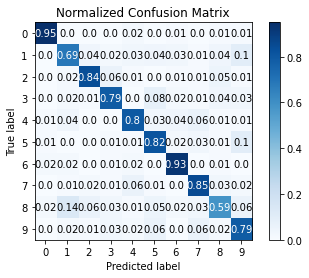

In [6]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, predictions, normalize=True)
plt.show()

In [10]:
from sklearn.datasets import load_digits
X, y= load_digits(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

In [11]:
rf_clf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=1)

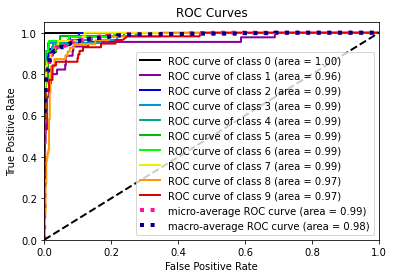

In [13]:
y_prob=rf_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_prob)
plt.show()

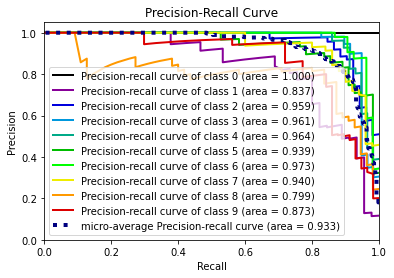

In [14]:
skplt.metrics.plot_precision_recall(y_test, y_prob)
plt.show()